In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [21]:
df = pd.read_csv('data_bersih_ver3.csv')

df = df.drop(
    ['garasi','jumlah_lantai','gym','tipe','Unnamed: 0'],
    axis = 1
)
df = df.drop_duplicates()

In [22]:
from feature_engine.outliers import OutlierTrimmer as OT

In [23]:
trimer =capper = OT(
    capping_method ='iqr', 
    tail = 'right', 
    fold = 3, 
    variables = ['harga']
)
trimer.fit(df)

OutlierTrimmer(capping_method='iqr', variables=['harga'])

In [24]:
df = trimer.transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12011 entries, 0 to 13495
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    12011 non-null  int64  
 1   kamar_tidur    12011 non-null  int64  
 2   luas_bangunan  12011 non-null  float64
 3   luas_tanah     12011 non-null  float64
 4   harga          12011 non-null  float64
 5   kecamatan      12011 non-null  object 
 6   kolam_renang   12011 non-null  bool   
 7   taman          12011 non-null  bool   
 8   listrik        12011 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(1)
memory usage: 774.1+ KB


In [25]:
df_copy = df.copy()

In [26]:
cat = [i for i in df_copy.columns if df_copy[i].dtypes in ['O','bool']]
df_copy[cat] = df_copy[cat].astype('O')

In [27]:
from feature_engine.encoding import OrdinalEncoder as OE

In [28]:
oe = OE(variables = [i for i in cat])
oe.fit(df_copy,df_copy['harga'])

OrdinalEncoder(variables=['kecamatan', 'kolam_renang', 'taman'])

In [10]:
df_copy = oe.transform(df_copy)

In [11]:
from sklearn.preprocessing import StandardScaler as ss

In [12]:
scale = ss()
scale.fit(df_copy)
df_copy = scale.transform(df_copy)

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(
    model,
    k = (2,10),
    metric = 'calinski_harabasz',
    timing = False
)

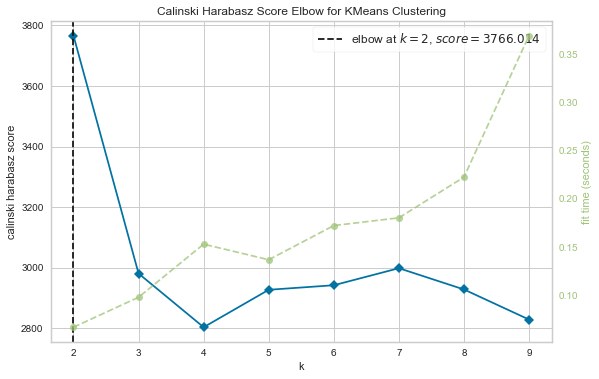

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
visualizer.fit(df_copy)
visualizer.show()

In [16]:
model = KMeans(n_clusters=2)
cluster = model.fit_predict(df_copy)

In [17]:
df_copy = pd.DataFrame(df_copy)

In [18]:
df_copy.columns = df.columns

In [19]:
df_copy['cluster'] = cluster

<AxesSubplot:>

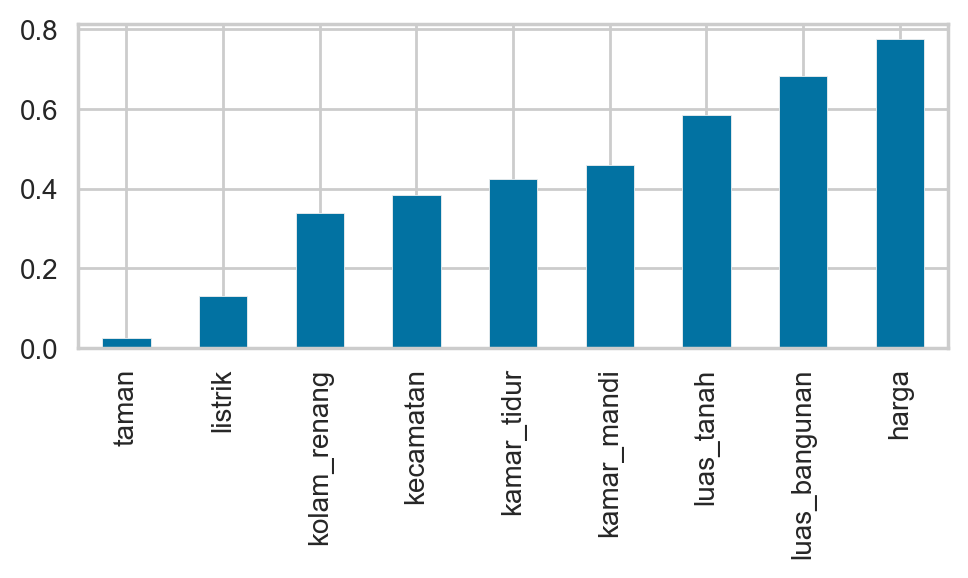

In [20]:
plt.figure(figsize=(5,2), dpi=200)
df_copy.corr()['cluster'][:-1].abs().sort_values().plot(kind='bar')